In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load all locations
files = ['Location1.csv', 'Location2.csv', 'Location3.csv', 'Location4.csv']

dfs = []
for file in files:
    df = pd.read_csv(f'../Data/{file}', parse_dates=['Time'])
    df['Location'] = file.split('.')[0]  # Add location name
    dfs.append(df)

In [4]:
# Combine all locations
data = pd.concat(dfs).sort_values(by=['Time', 'Location'])
data.set_index('Time', inplace=True)

In [5]:
# Basic overview
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175200 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 14.7+ MB
None
       temperature_2m  relativehumidity_2m    dewpoint_2m  windspeed_10m  \
count   175200.000000        175200.000000  175200.000000  175200.000000   
mean        46.655994  

In [6]:
# Missing values check
print(data.isna().sum())

temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64


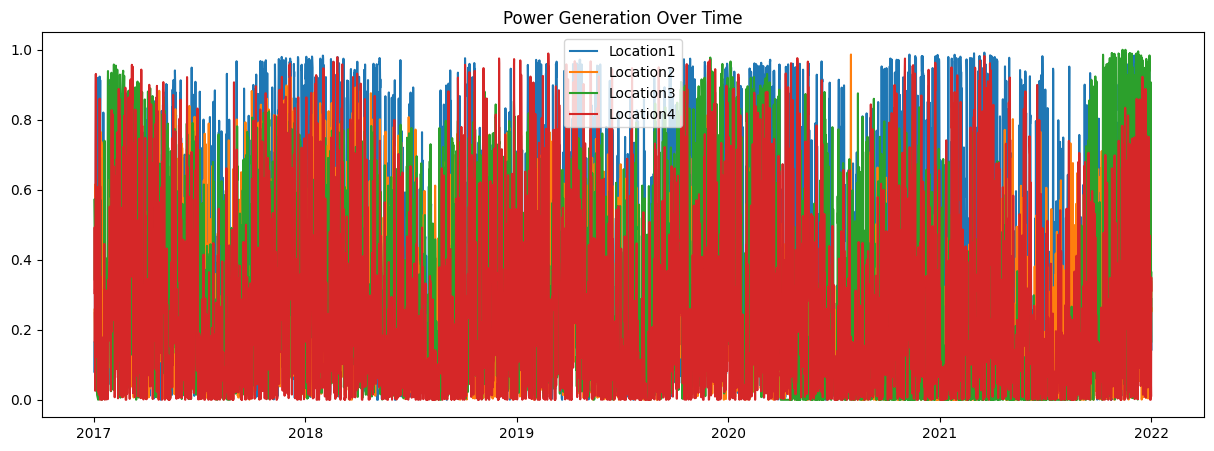

In [7]:
# Plot Power over time for each location
plt.figure(figsize=(15, 5))
for loc in data['Location'].unique():
    plt.plot(data[data['Location']==loc]['Power'], label=loc)
plt.title("Power Generation Over Time")
plt.legend()
plt.show()

In [92]:
data.to_csv('../Data/Combined.csv')

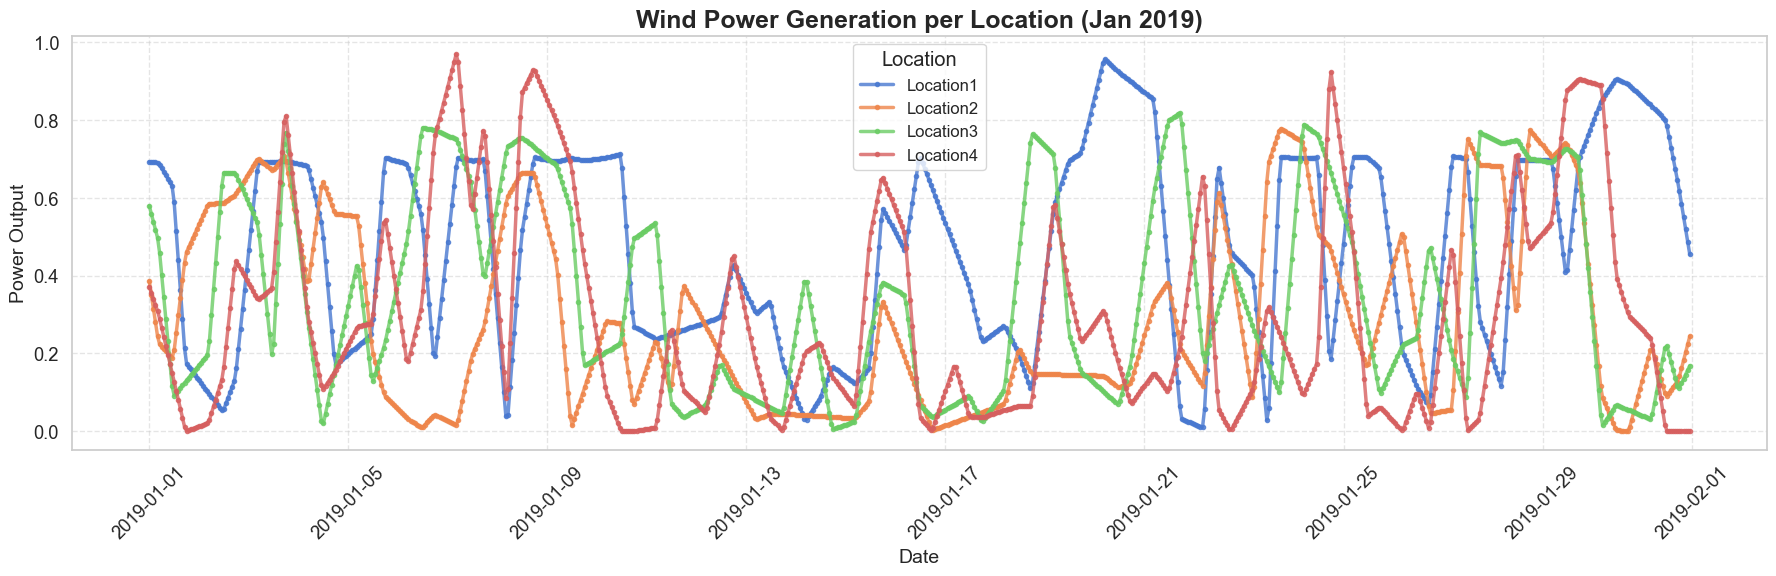

In [27]:

# Set seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Filter data for January 2019
one_month_data = data.loc['2019-01-01':'2019-01-31']

# Create the plot
plt.figure(figsize=(18, 6))

for loc in one_month_data['Location'].unique():
    subset = one_month_data[one_month_data['Location'] == loc]
    plt.plot(subset.index, subset['Power'], label=loc, linewidth=2.5, alpha=0.8, marker='o', markersize=3)

# Highlight title & axis
plt.title("Wind Power Generation per Location (Jan 2019)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Power Output", fontsize=14)

# Improve x-axis formatting for date
plt.xticks(rotation=45)
plt.tight_layout()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(title='Location', fontsize=12)

# Optional: add minor ticks
plt.minorticks_on()

plt.show()


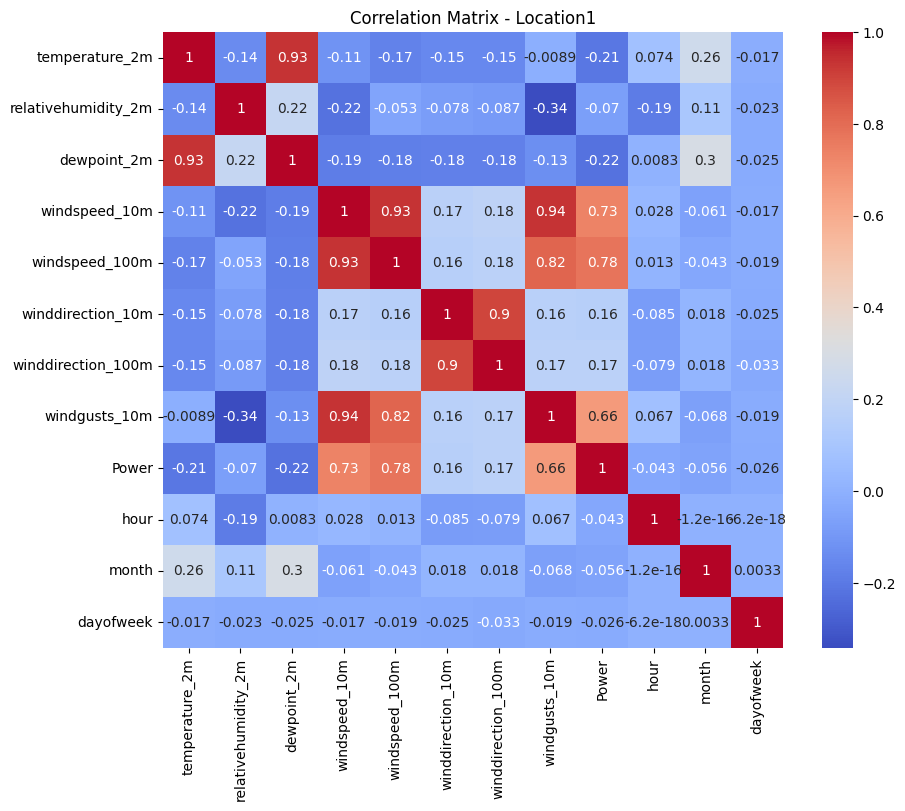

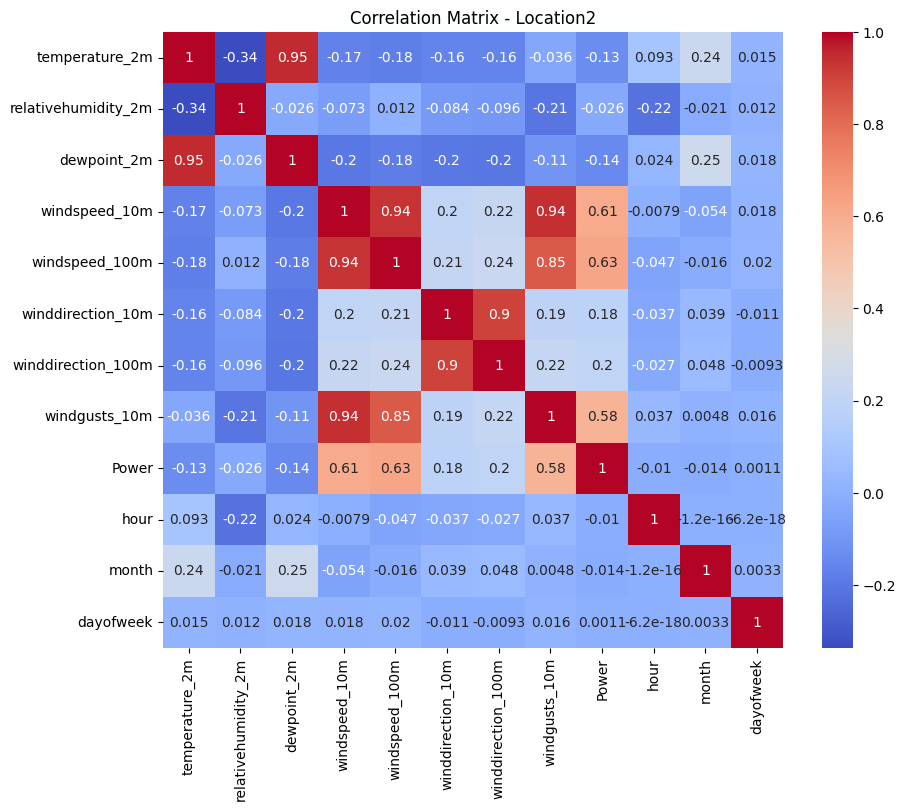

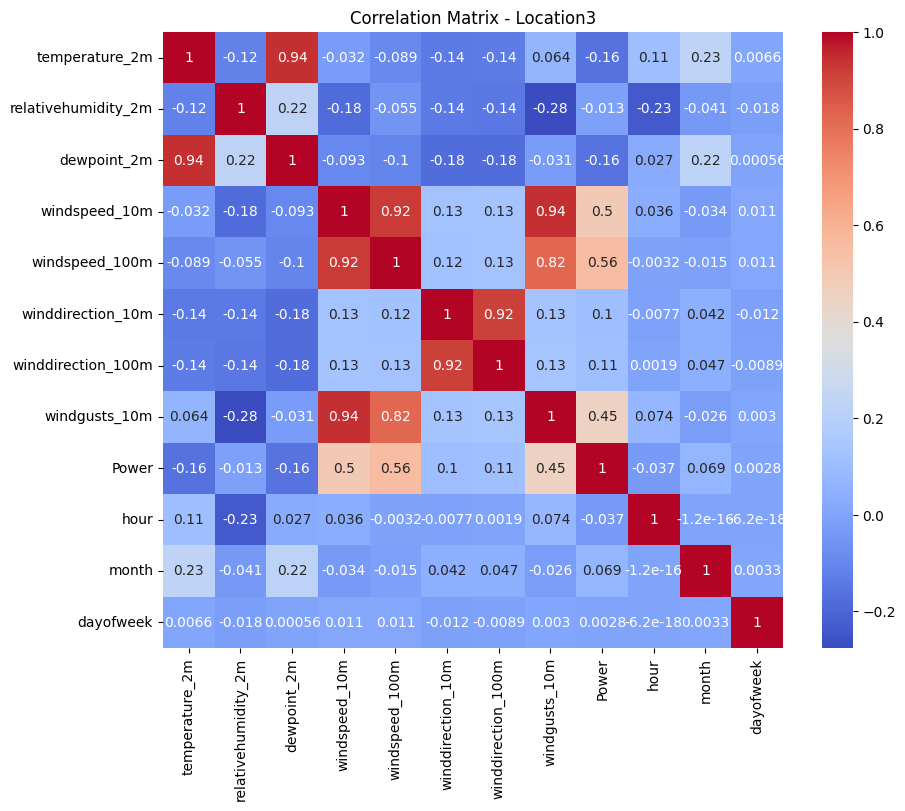

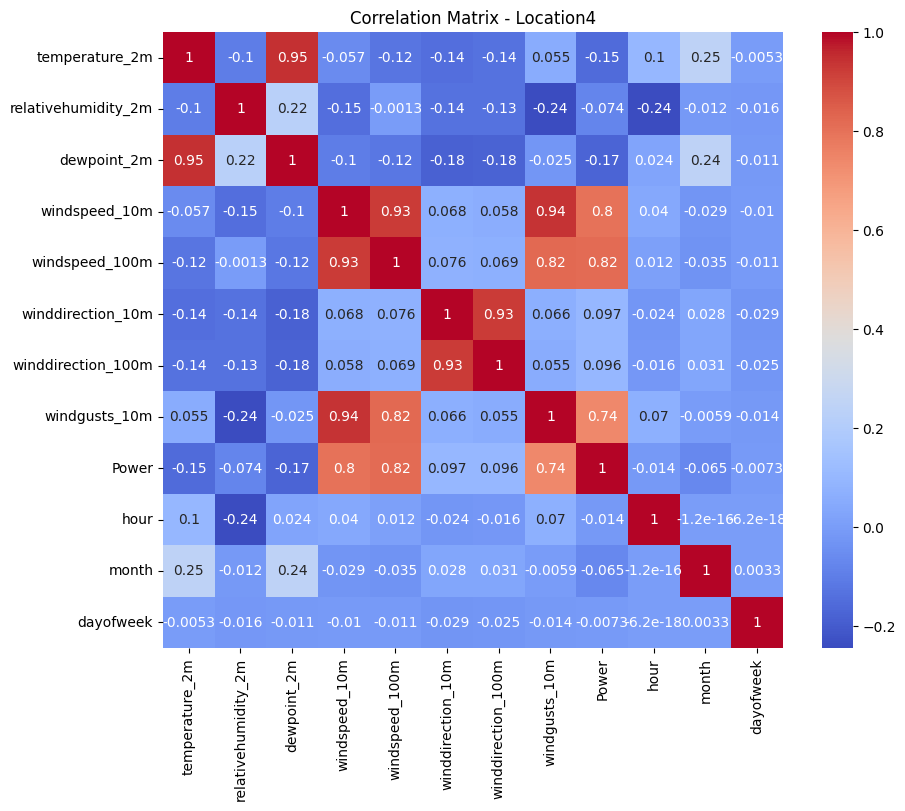

In [17]:
for loc in data['Location'].unique():
    plt.figure(figsize=(10, 8))
    numeric_data = data[data['Location'] == loc].drop(columns=['Location'])
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix - {loc}")
    plt.show()

In [11]:

# ADF Test for stationarity per location
for loc in data['Location'].unique():
    result = adfuller(data[data['Location']==loc]['Power'].dropna())
    print(f"ADF Statistic for {loc}: {result[0]}")
    print(f"p-value: {result[1]}\n")

ADF Statistic for Location1: -19.63387251654793
p-value: 0.0

ADF Statistic for Location2: -17.707977188205458
p-value: 3.5127334131813465e-30

ADF Statistic for Location3: -15.518720625728564
p-value: 2.2982927291516567e-28

ADF Statistic for Location4: -20.45728875601044
p-value: 0.0



/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78856/4076710486.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loc_data = data[data['Location']==loc]['Power'].asfreq('H')


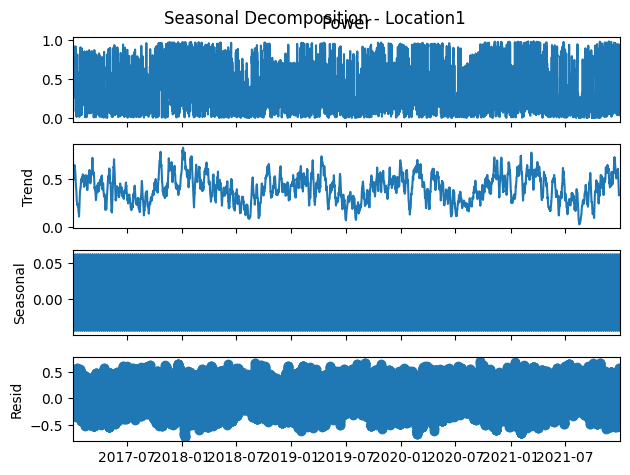

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78856/4076710486.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loc_data = data[data['Location']==loc]['Power'].asfreq('H')


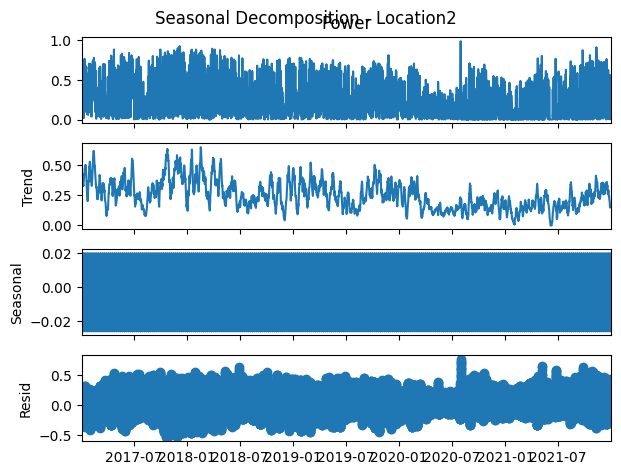

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78856/4076710486.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loc_data = data[data['Location']==loc]['Power'].asfreq('H')


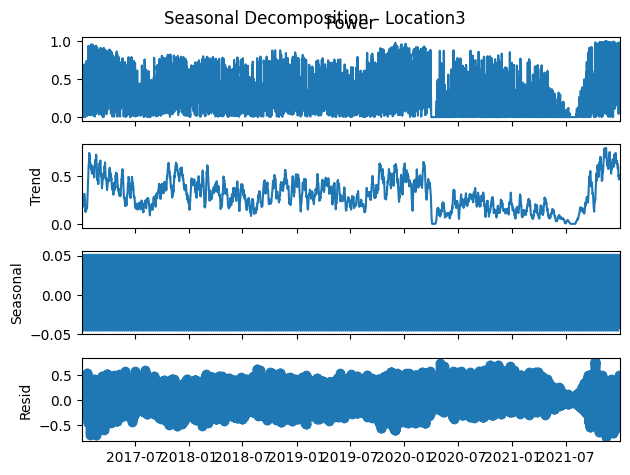

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_78856/4076710486.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loc_data = data[data['Location']==loc]['Power'].asfreq('H')


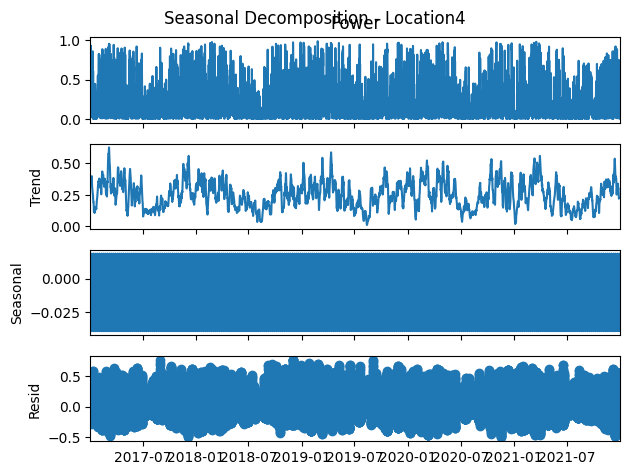

In [12]:
# Seasonality decomposition per location
for loc in data['Location'].unique():
    loc_data = data[data['Location']==loc]['Power'].asfreq('H')
    result = seasonal_decompose(loc_data, model='additive', period=24*7)
    result.plot()
    plt.suptitle(f"Seasonal Decomposition - {loc}")
    plt.show()

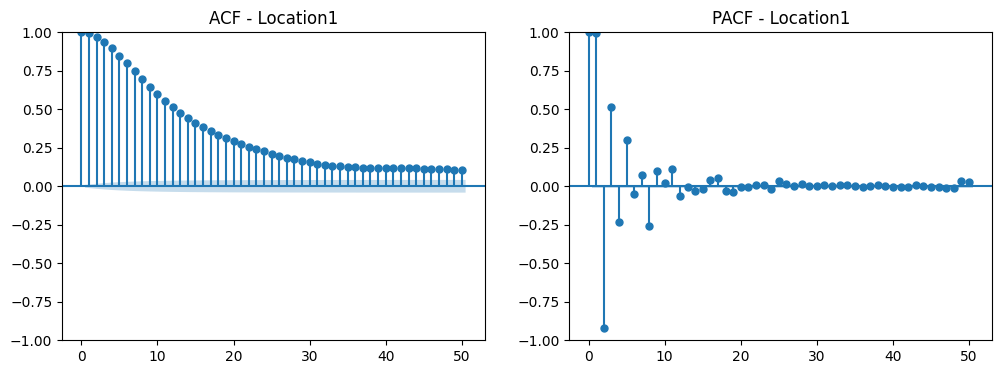

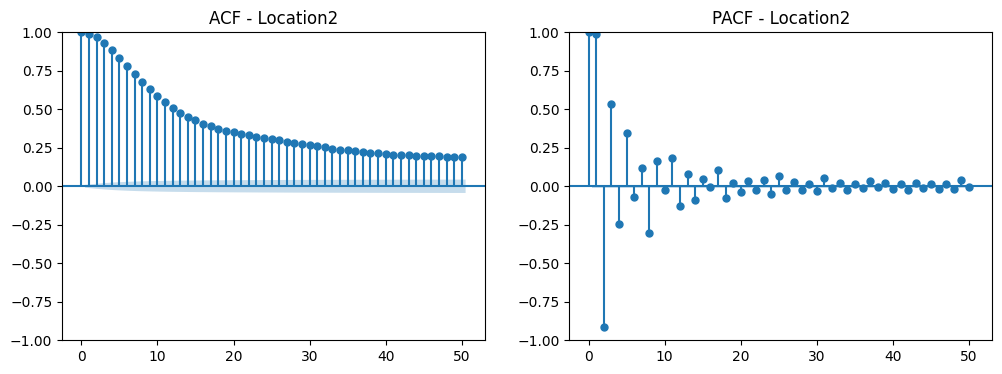

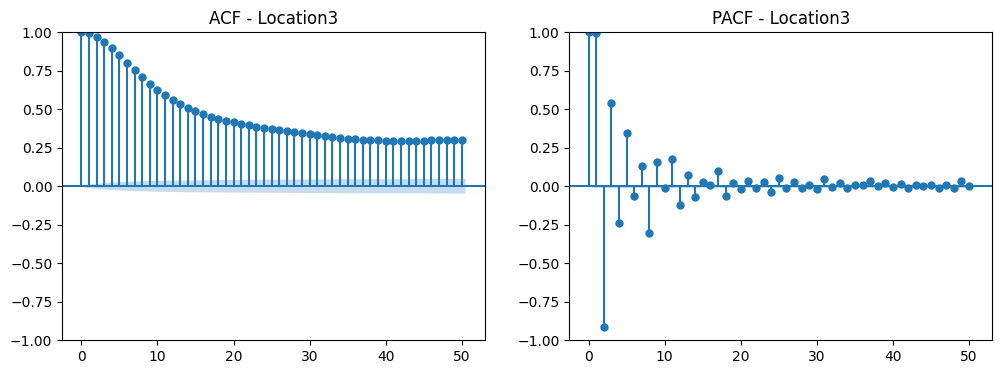

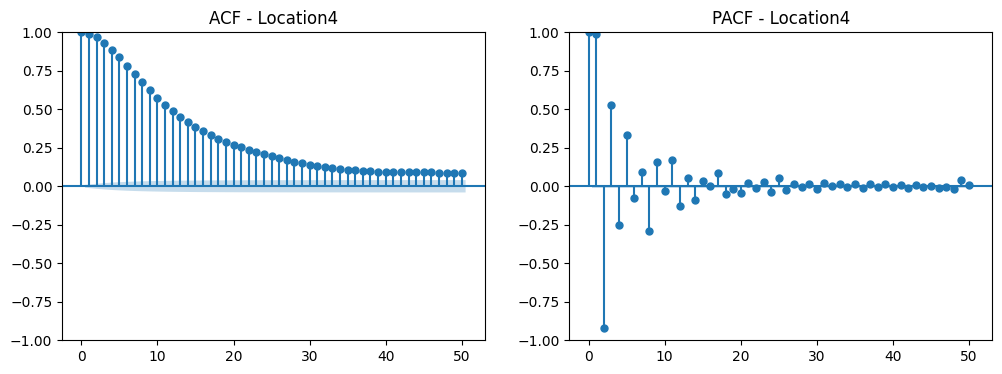

In [13]:

# ACF & PACF per location
for loc in data['Location'].unique():
    loc_data = data[data['Location']==loc]['Power'].dropna()

    fig, ax = plt.subplots(1,2, figsize=(12,4))
    plot_acf(loc_data, lags=50, ax=ax[0])
    plot_pacf(loc_data, lags=50, ax=ax[1])
    ax[0].set_title(f"ACF - {loc}")
    ax[1].set_title(f"PACF - {loc}")
    plt.show()

In [14]:
# Grouped boxplots for seasonal patterns
data['hour'] = data.index.hour
data['month'] = data.index.month
data['dayofweek'] = data.index.dayofweek

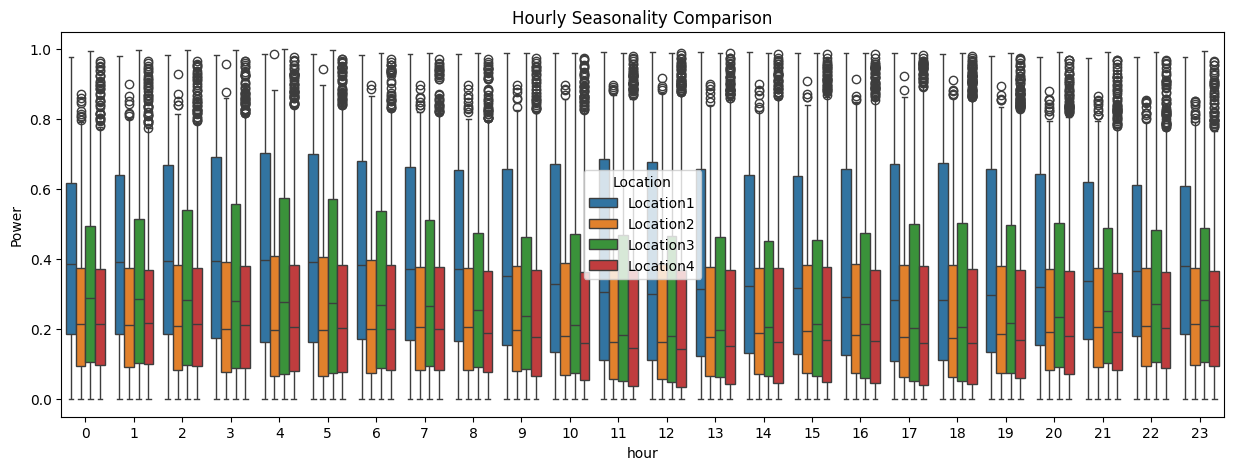

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x='hour', y='Power', hue='Location', data=data)
plt.title("Hourly Seasonality Comparison")
plt.show()


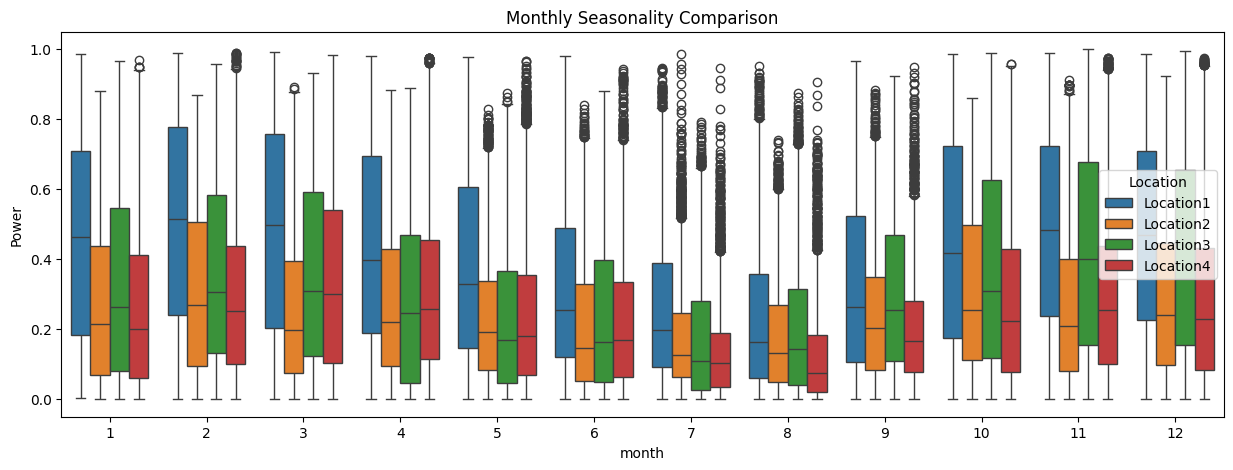

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x='month', y='Power', hue='Location', data=data)
plt.title("Monthly Seasonality Comparison")
plt.show()

In [39]:

# Filter data for January 2019
one_month_data = data.loc['2019-01-01':'2019-03-31']



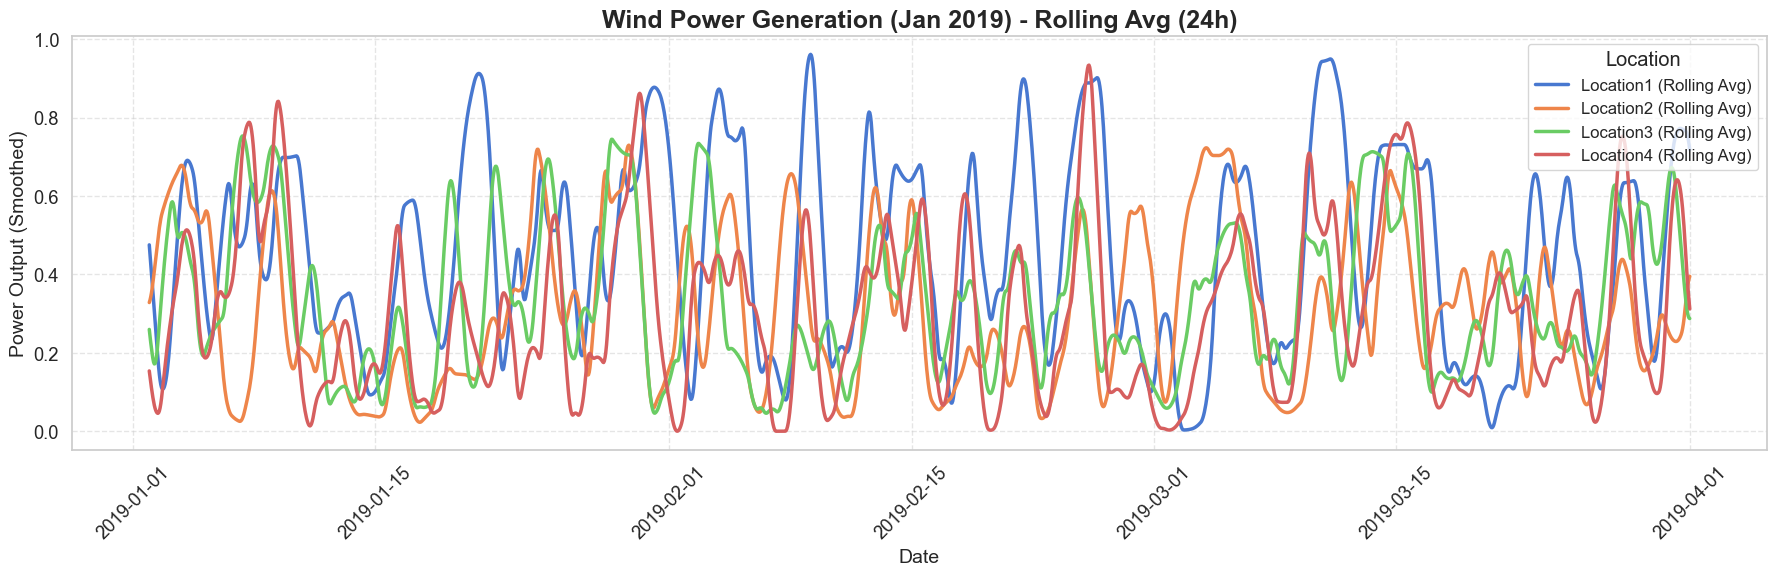

In [40]:
plt.figure(figsize=(18, 6))
window_size = 24  # e.g. 24 hours moving average

for loc in one_month_data['Location'].unique():
    subset = one_month_data[one_month_data['Location'] == loc]
    rolling_power = subset['Power'].rolling(window=window_size).mean()
    plt.plot(subset.index, rolling_power, label=f"{loc} (Rolling Avg)", linewidth=2.5)

plt.title("Wind Power Generation (Jan 2019) - Rolling Avg (24h)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Power Output (Smoothed)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Location', fontsize=12)
plt.tight_layout()
plt.show()


In [44]:
import plotly.express as px

# Prepare subset data
subset = one_month_data.copy()

fig = px.line(subset, x=subset.index, y='Power', color='Location',
              title='Interactive Wind Power Generation (Jan 2019)',
              labels={'Power': 'Power Output', 'index': 'Date'},
              template='plotly_white')

fig.update_layout(title_font_size=20, title_font_color='darkblue')
fig.show()


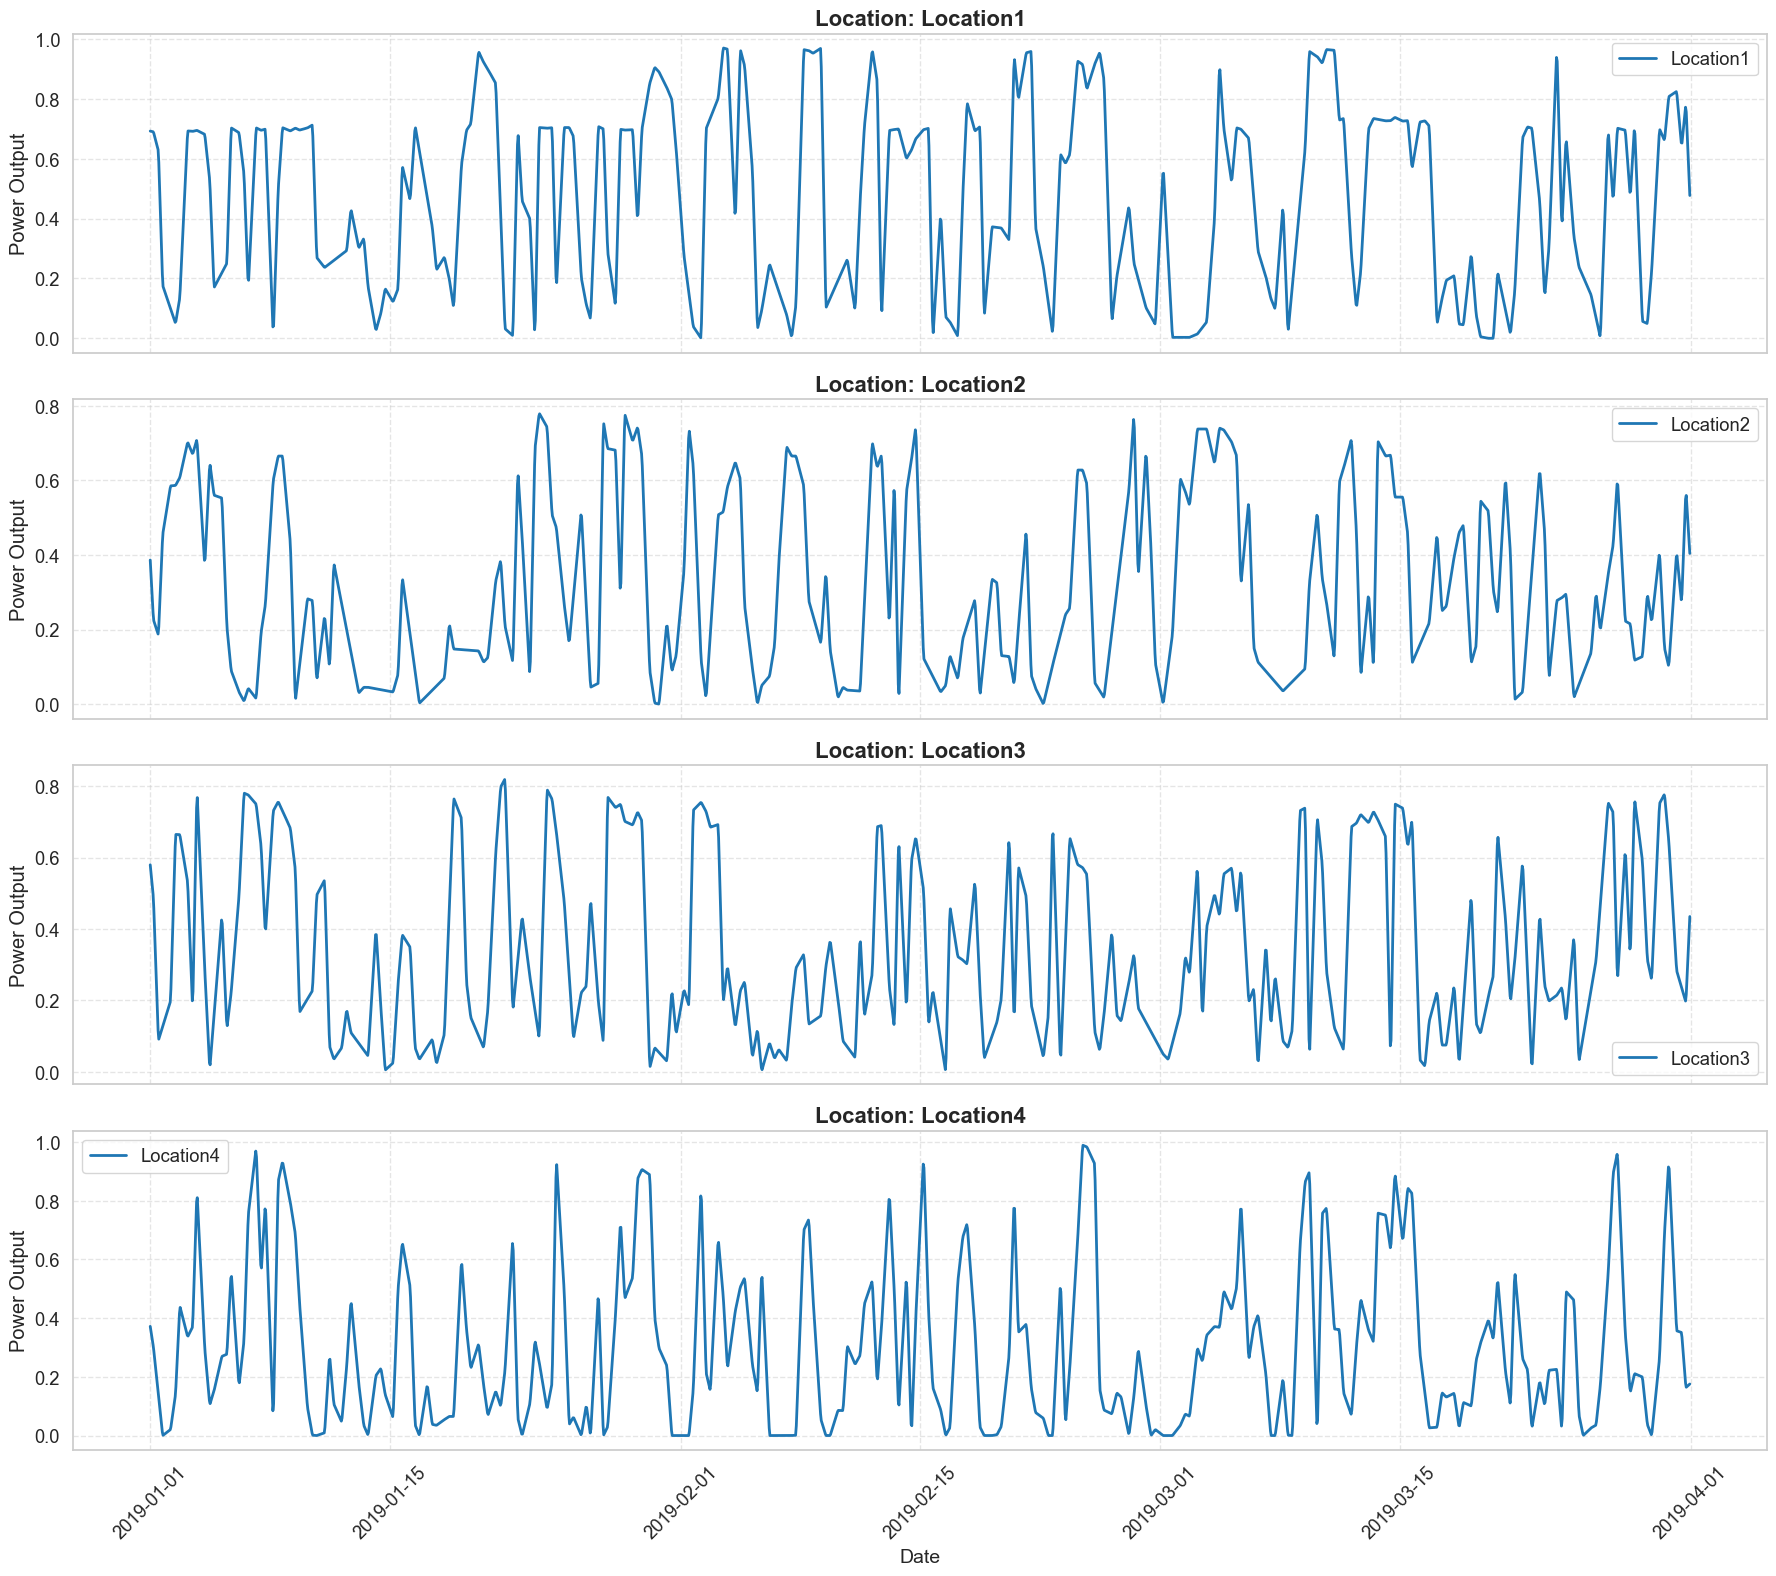

In [45]:
import matplotlib.dates as mdates

locations = one_month_data['Location'].unique()
n_locs = len(locations)

fig, axs = plt.subplots(n_locs, 1, figsize=(18, 4 * n_locs), sharex=True)

for i, loc in enumerate(locations):
    subset = one_month_data[one_month_data['Location'] == loc]
    axs[i].plot(subset.index, subset['Power'], label=loc, color='tab:blue', linewidth=2)
    axs[i].set_title(f"Location: {loc}", fontsize=16, fontweight='bold')
    axs[i].set_ylabel("Power Output")
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend()

axs[-1].set_xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


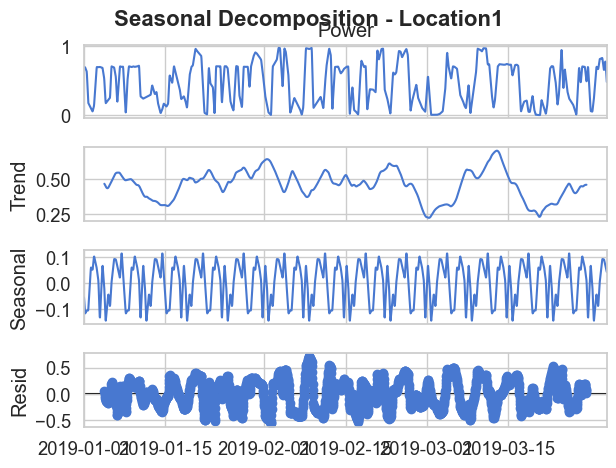

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose for one location (choose any)
loc_to_decompose = 'Location1'
subset = one_month_data[one_month_data['Location'] == loc_to_decompose]['Power']

# Set frequency if needed (assuming hourly data => 24*7=168 weekly seasonality)
decomp = seasonal_decompose(subset, model='additive', period=168)

decomp.plot()
plt.suptitle(f"Seasonal Decomposition - {loc_to_decompose}", fontsize=16, fontweight='bold')
plt.show()


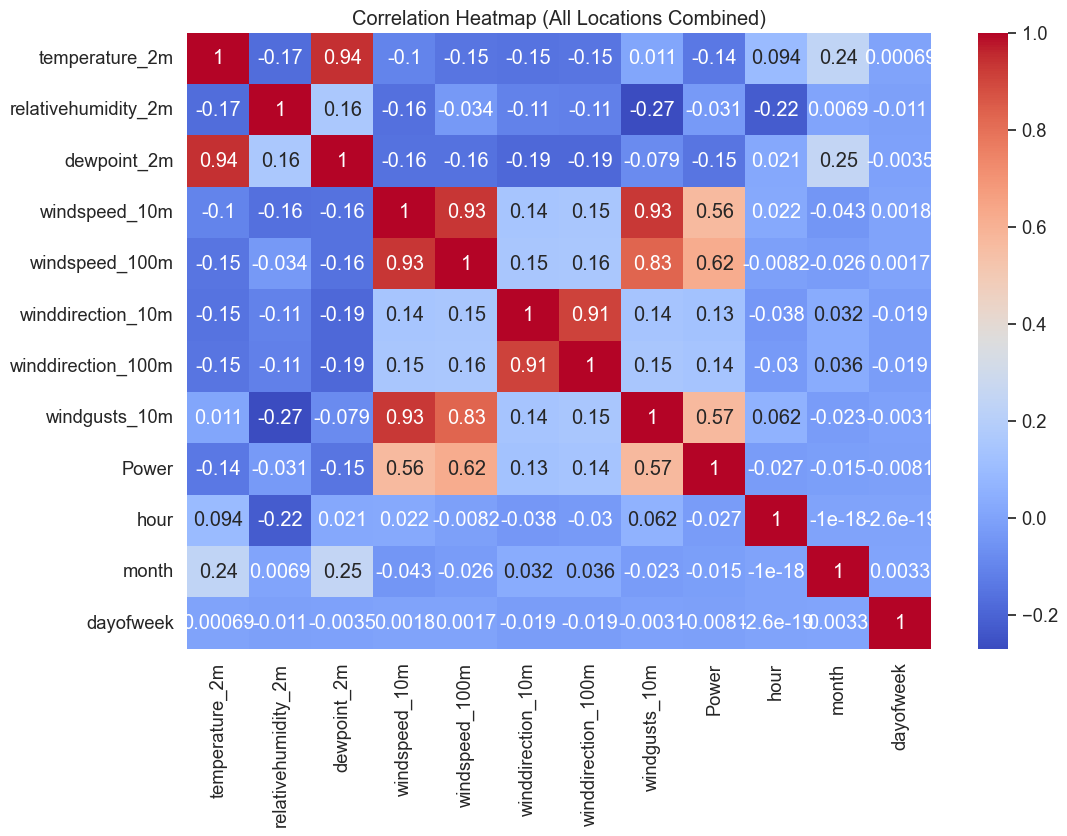

In [47]:
# -------------------
# Correlation Heatmap
# -------------------

plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (All Locations Combined)")
plt.show()

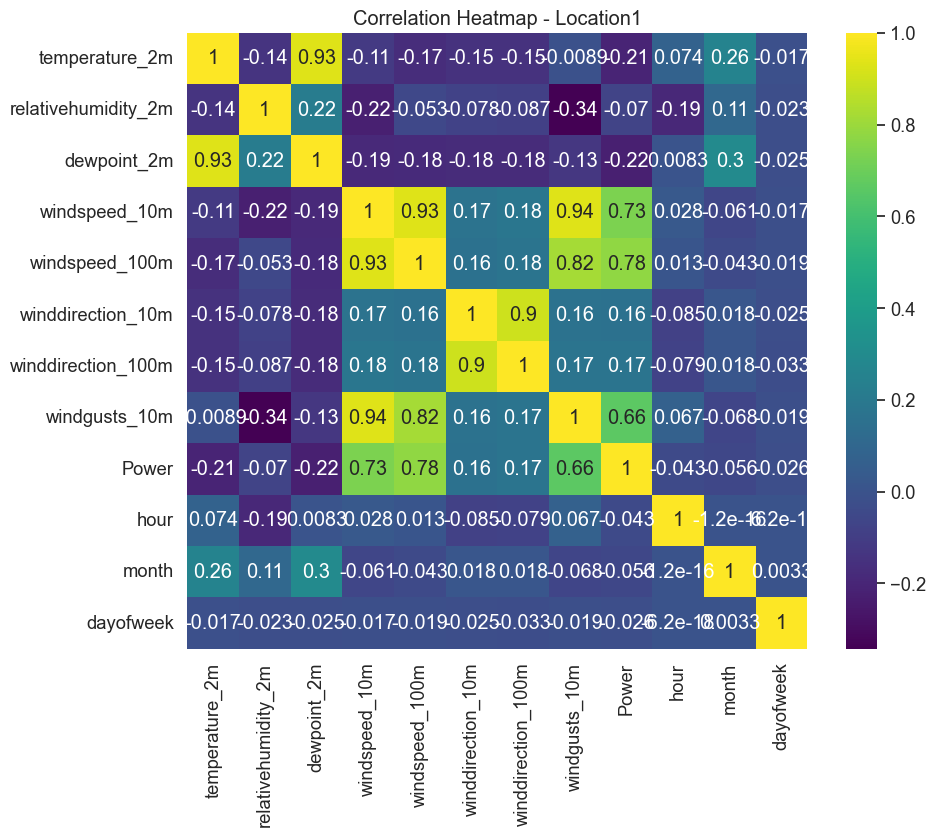

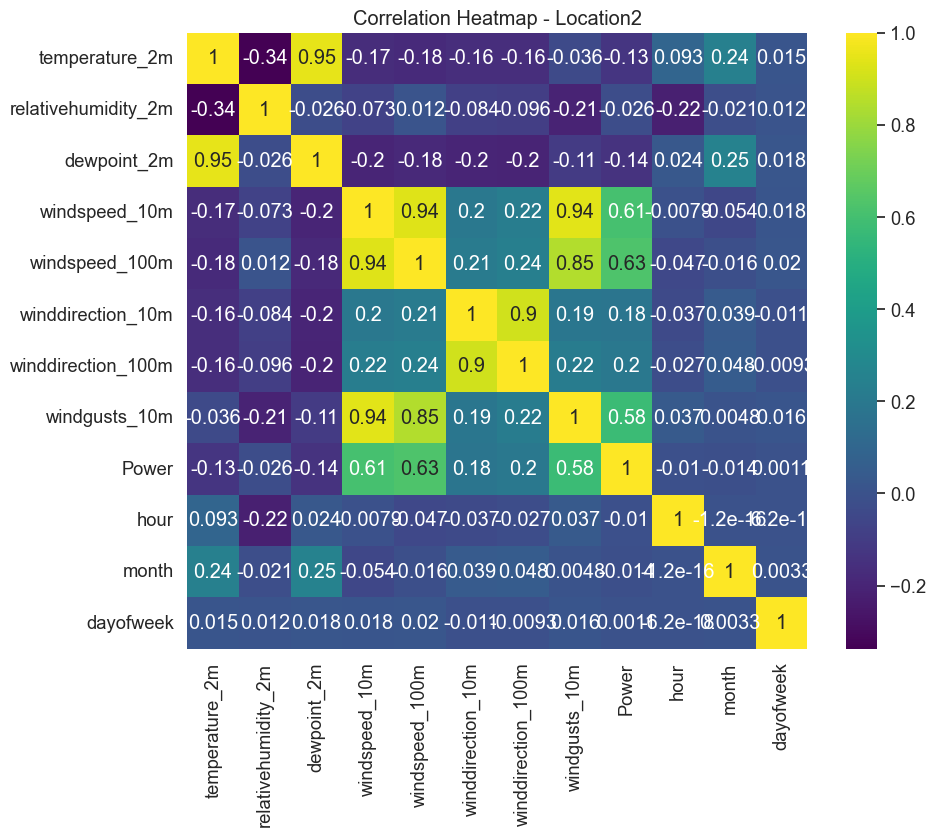

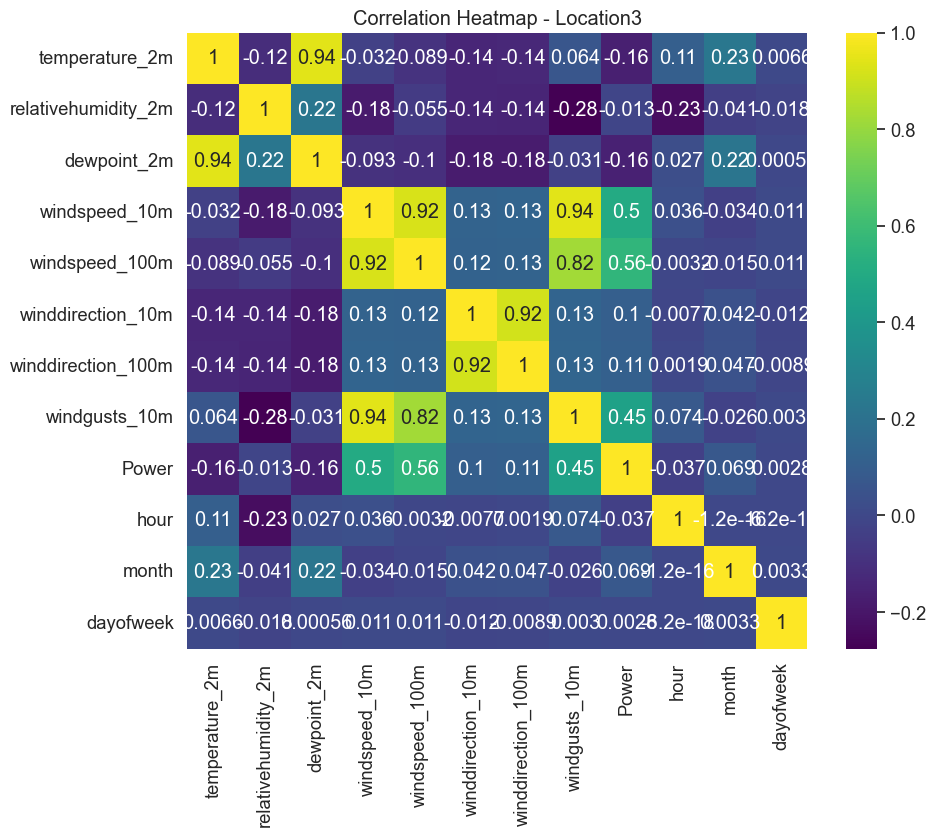

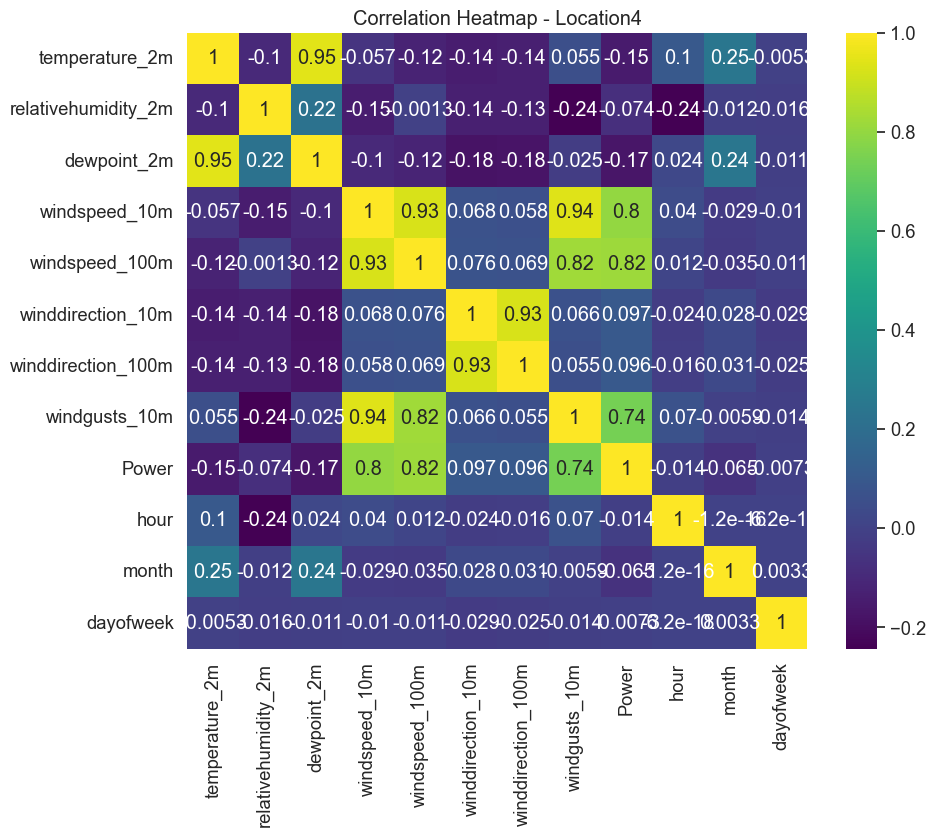

In [48]:
# Separate heatmap for each location
for loc in data['Location'].unique():
    plt.figure(figsize=(10, 8))
    subset = data[data['Location'] == loc].select_dtypes(include=np.number)
    sns.heatmap(subset.corr(), annot=True, cmap='viridis')
    plt.title(f"Correlation Heatmap - {loc}")
    plt.show()

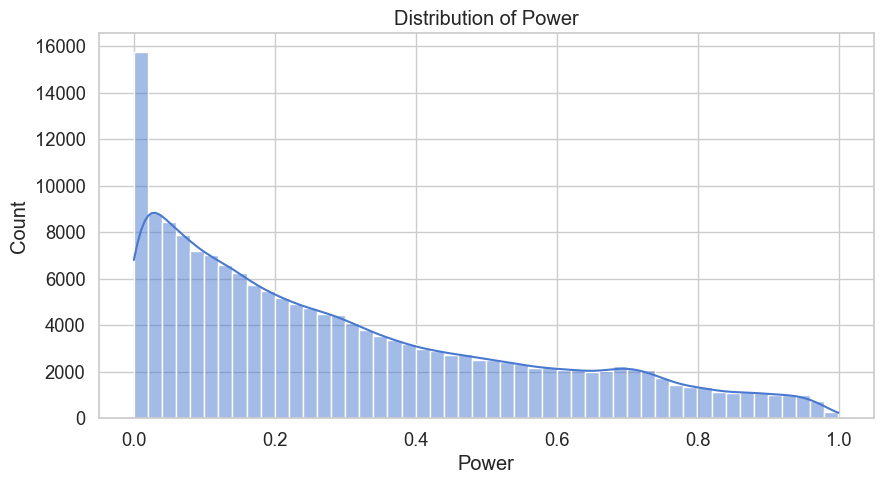

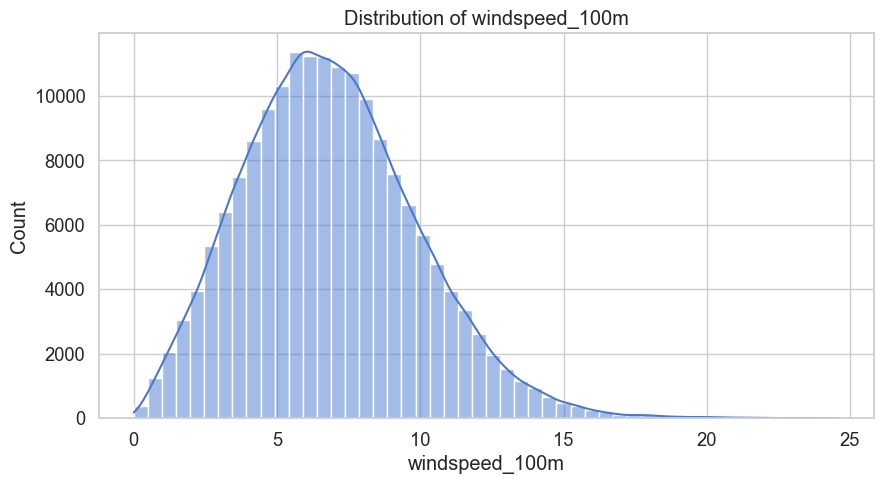

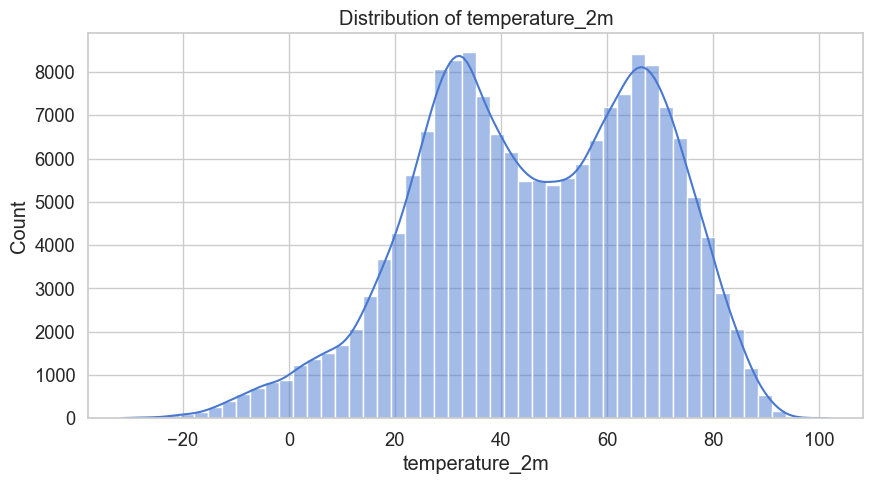

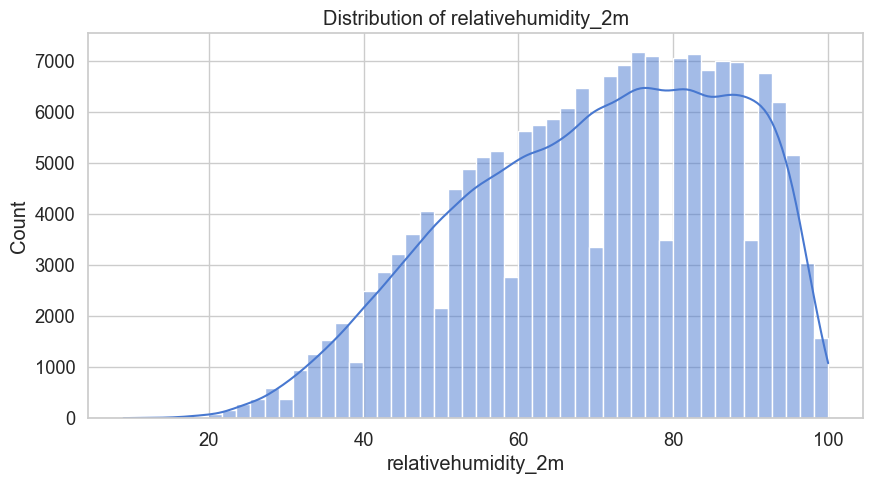

In [49]:


num_cols = ['Power', 'windspeed_100m', 'temperature_2m', 'relativehumidity_2m']
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

In [51]:
from scipy.stats import zscore

In [52]:
# -------------------
# Outlier Detection using Z-score
# -------------------

z_scores = np.abs(zscore(data.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum()
print("\n Outlier count (z-score > 3):")
print(pd.Series(outliers, index=data.select_dtypes(include=np.number).columns))


 Outlier count (z-score > 3):
temperature_2m         3921
relativehumidity_2m    3921
dewpoint_2m            3921
windspeed_10m          3921
windspeed_100m         3921
winddirection_10m      3921
winddirection_100m     3921
windgusts_10m          3921
Power                  3921
hour                   3921
month                  3921
dayofweek              3921
dtype: int64


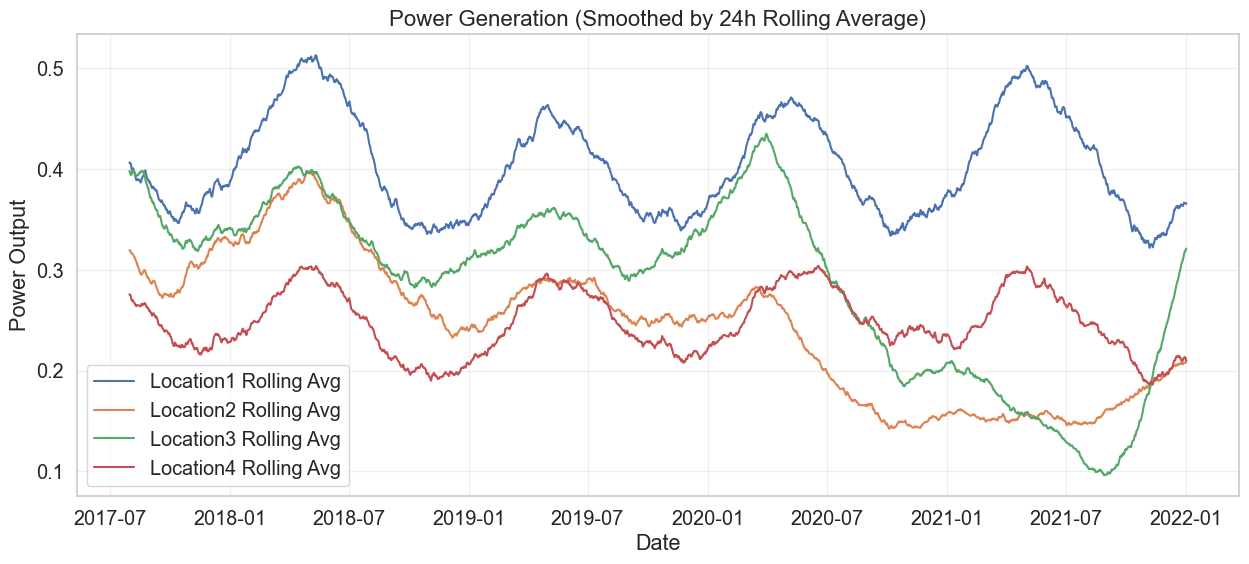

In [79]:
# -------------------
# Rolling Averages (Trend smoothing)
# -------------------

plt.figure(figsize=(15, 6))
window_size = 24*7*30  # 24-hour moving average

for loc in data['Location'].unique():
    subset = data[data['Location'] == loc]
    plt.plot(subset.index, subset['Power'].rolling(window=window_size).mean(), label=f"{loc} Rolling Avg")

plt.title("Power Generation (Smoothed by 24h Rolling Average)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Power Output")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [54]:
# -------------------
# Interactive Plot (Plotly)
# -------------------

fig = px.line(data, x=data.index, y='Power', color='Location',
              title='Interactive Wind Power Generation',
              labels={'Power': 'Power Output', 'index': 'Date'},
              template='plotly_white')
fig.update_layout(title_font_size=20, title_font_color='darkblue')
fig.show()


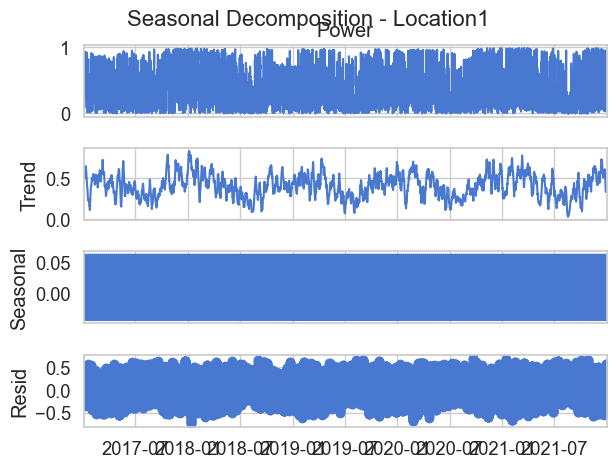

In [55]:

# -------------------
# Seasonal Decomposition
# -------------------

# Decompose for one location for example
loc_to_decompose = 'Location1'
subset = data[data['Location'] == loc_to_decompose]['Power']

# Set seasonal period (hourly data => weekly seasonality = 24*7 = 168)
result = seasonal_decompose(subset, model='additive', period=168)

result.plot()
plt.suptitle(f"Seasonal Decomposition - {loc_to_decompose}", fontsize=16)
plt.show()

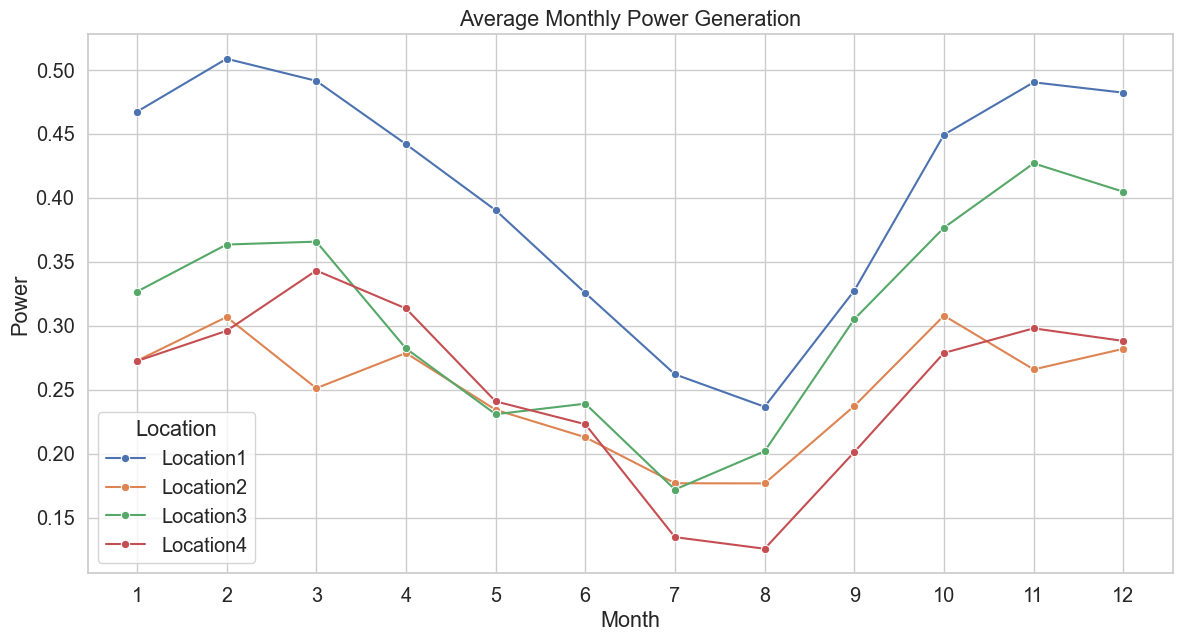

In [71]:
# -------------------
# Monthly Aggregation Plot
# -------------------

data['Month'] = data.index.month
monthly_power = data.groupby(['Month', 'Location'])['Power'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_power, x='Month', y='Power', hue='Location', marker="o")
plt.title("Average Monthly Power Generation")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

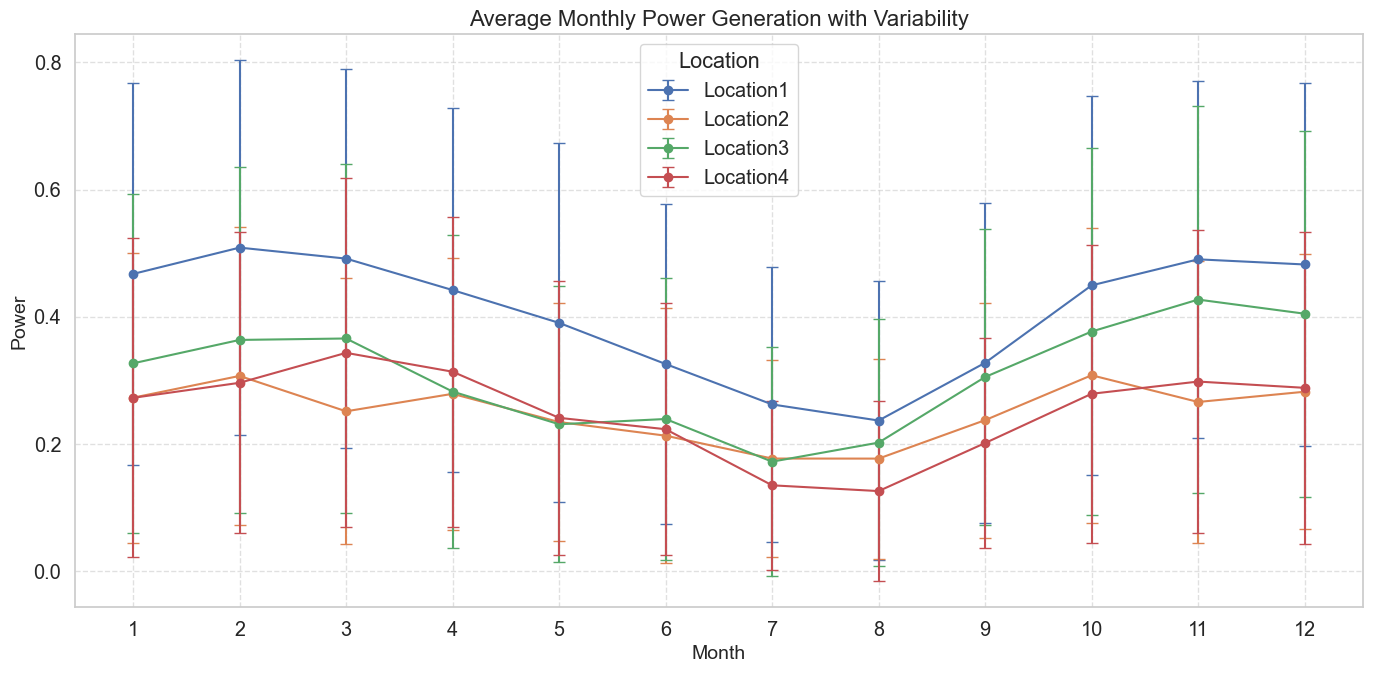

In [70]:
# -------------------
# Monthly Aggregation Plot with STD
# -------------------

# Extract Month
data['Month'] = data.index.month

# Group by Month and Location: calculate mean and std
monthly_stats = data.groupby(['Month', 'Location'])['Power'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 7))

# Plot with error bars for each location
for loc in data['Location'].unique():
    subset = monthly_stats[monthly_stats['Location'] == loc]
    plt.errorbar(subset['Month'], subset['mean'], yerr=subset['std'], label=loc, marker='o', capsize=4)

plt.title("Average Monthly Power Generation with Variability", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Location')
plt.tight_layout()
plt.show()


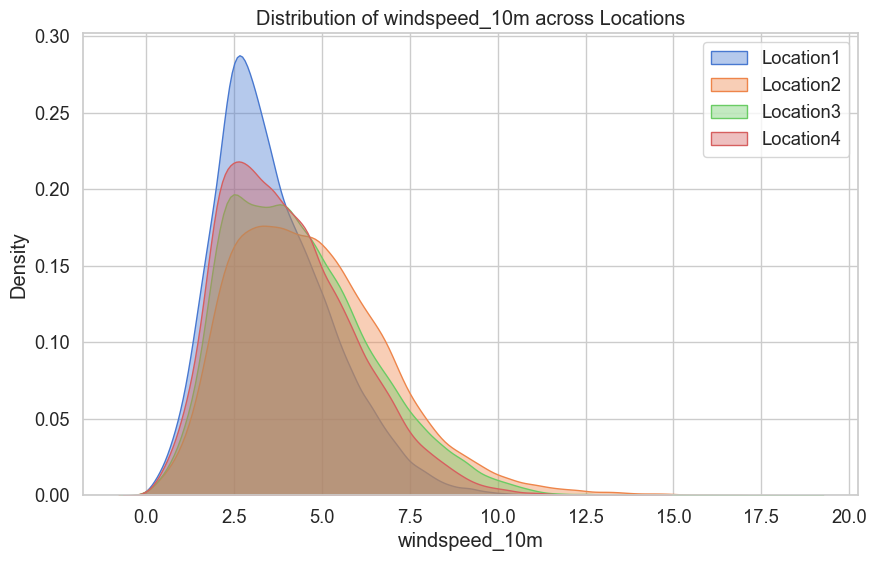

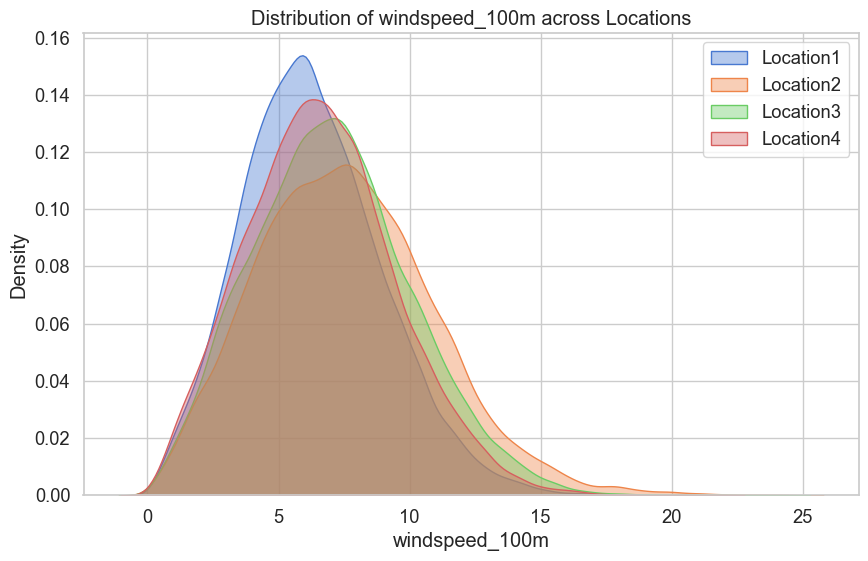

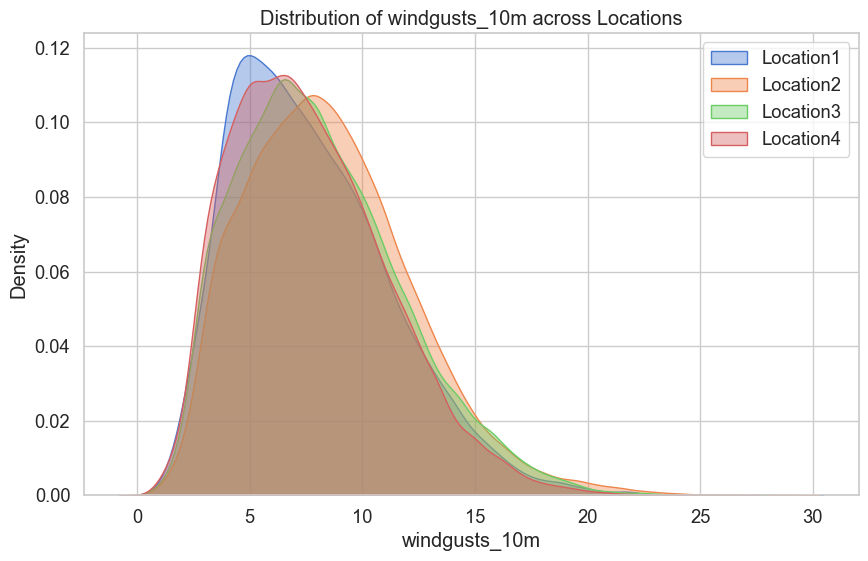

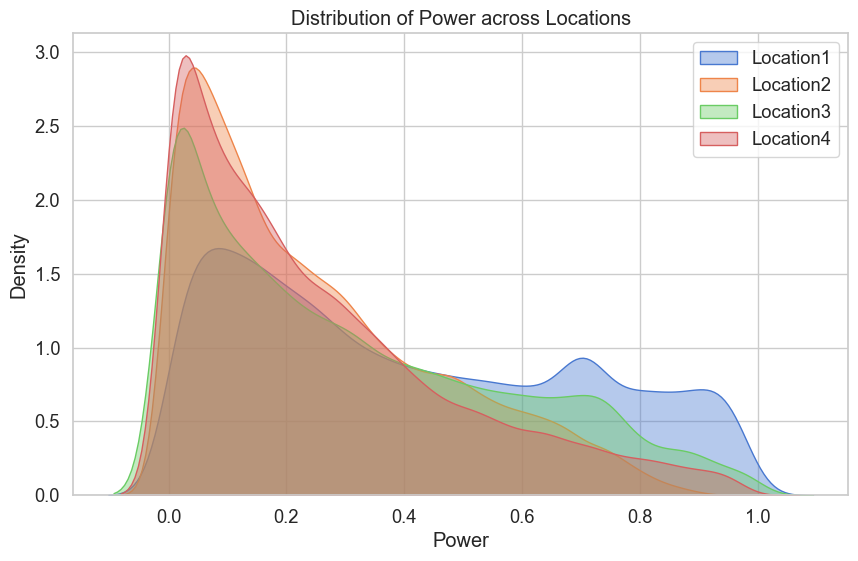

In [58]:


# List of numerical features (excluding Location and Timestamp)
features = [ 'windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'Power']

# Set global plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot each feature
for feature in features:
    plt.figure(figsize=(10,6))
    for loc in data['Location'].unique():
        subset = data[data['Location']==loc]
        sns.kdeplot(subset[feature], label=loc, fill=True, alpha=0.4)
    
    plt.title(f'Distribution of {feature} across Locations')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


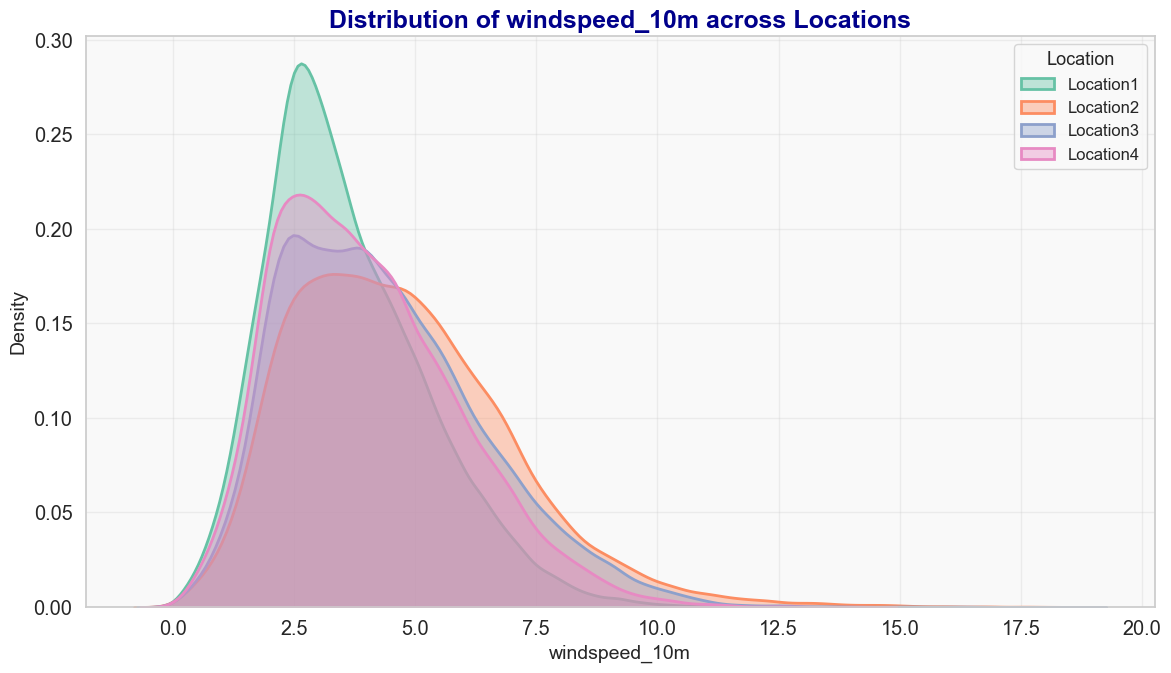

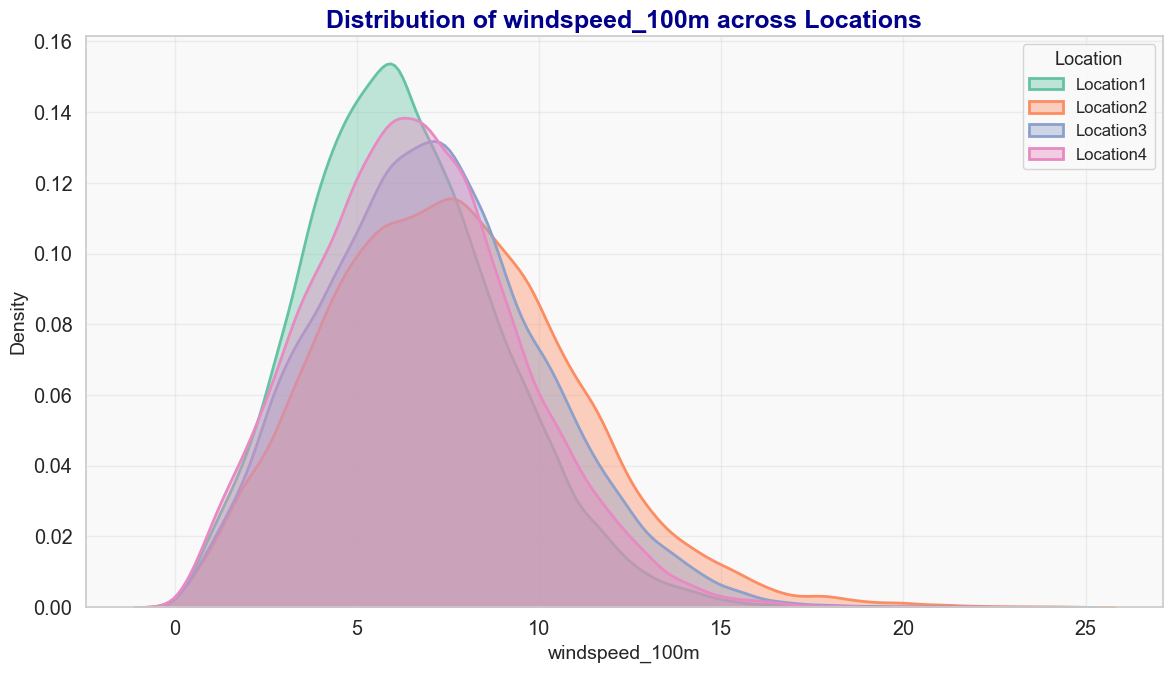

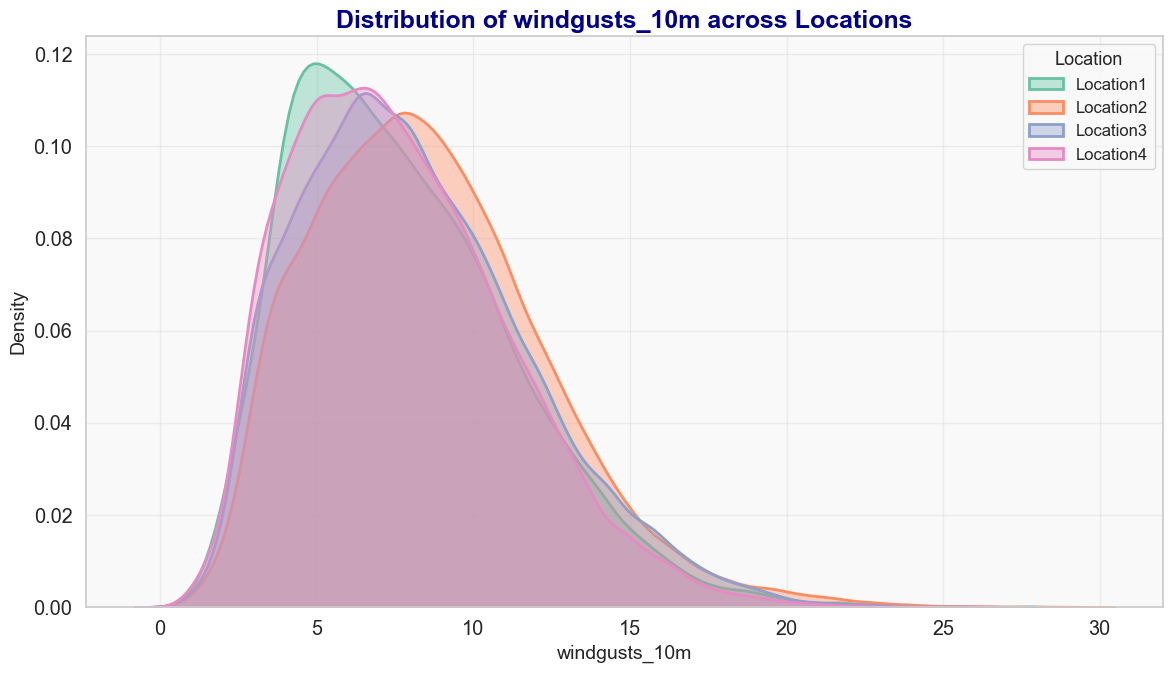

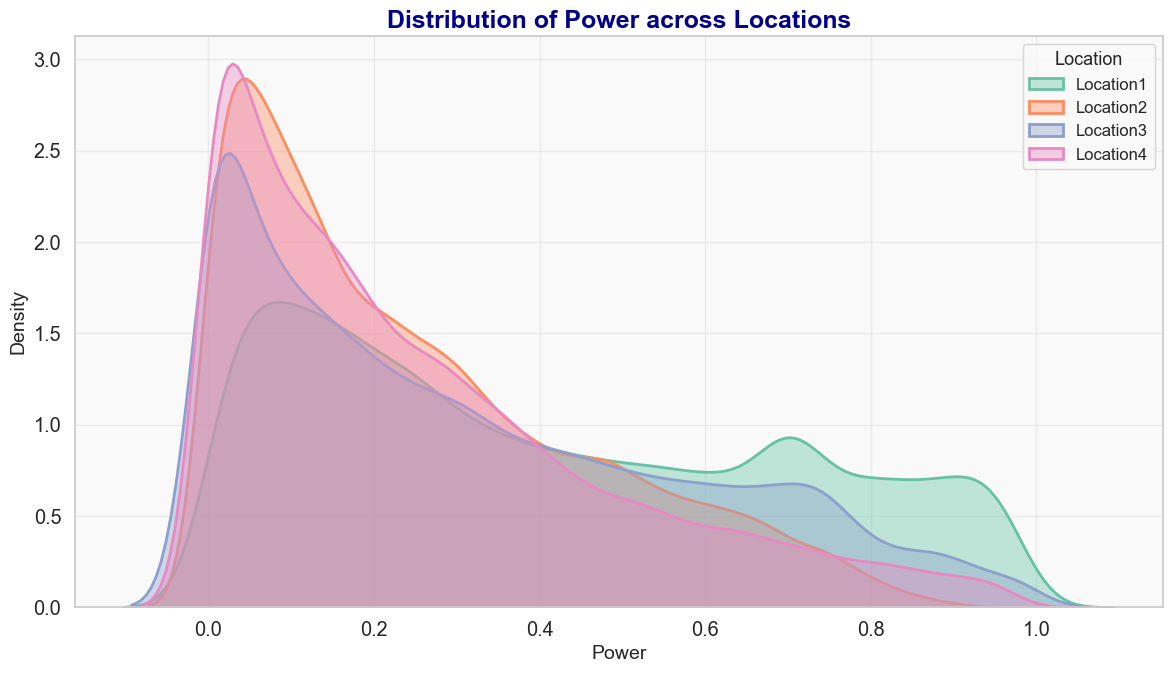

In [60]:
# Select features of interest
features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'Power']

# Improved color palette
palette = sns.color_palette("Set2", len(data['Location'].unique()))

# Global styling
sns.set(style="whitegrid", font_scale=1.3, rc={"axes.facecolor":"#f9f9f9"})

# Iterate through each feature
for feature in features:
    plt.figure(figsize=(12, 7))
    
    for idx, loc in enumerate(data['Location'].unique()):
        subset = data[data['Location'] == loc]
        sns.kdeplot(
            subset[feature], 
            label=loc, 
            fill=True, 
            alpha=0.4, 
            linewidth=2,
            color=palette[idx]
        )
    
    plt.title(f'Distribution of {feature} across Locations', fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel(f"{feature}", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(title='Location', fontsize=12, title_fontsize=13, loc='upper right', frameon=True)
    plt.tight_layout()
    plt.show()


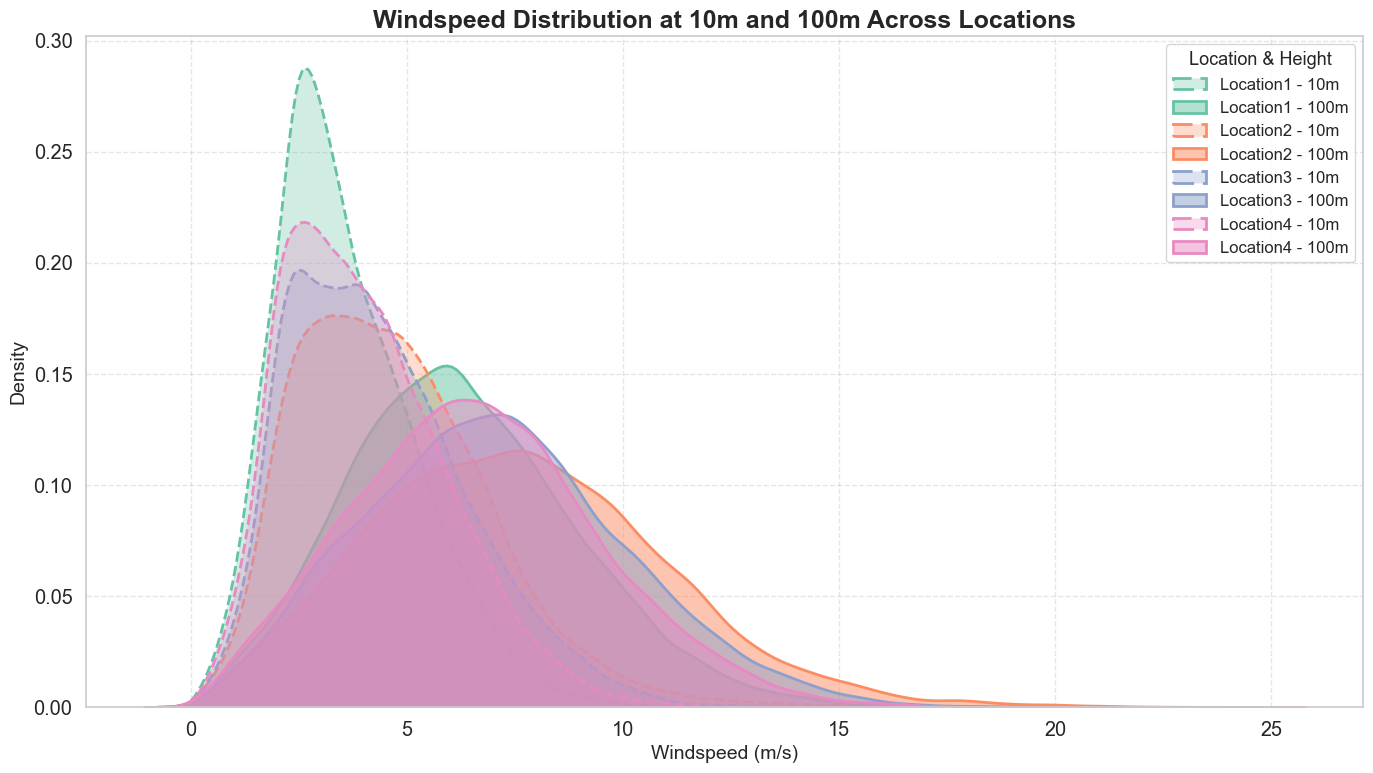

In [63]:
# Set global style
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(14, 8))

# Define custom colors for locations
colors = sns.color_palette("Set2", len(data['Location'].unique()))

for i, loc in enumerate(data['Location'].unique()):
    subset = data[data['Location'] == loc]
    
    # Windspeed 10m
    sns.kdeplot(
        subset['windspeed_10m'], 
        label=f'{loc} - 10m',
        color=colors[i],
        linestyle='--',
        linewidth=2,
        fill=True,
        alpha=0.3
    )
    
    # Windspeed 100m
    sns.kdeplot(
        subset['windspeed_100m'], 
        label=f'{loc} - 100m',
        color=colors[i],
        linestyle='-',
        linewidth=2,
        fill=True,
        alpha=0.5
    )

plt.title('Windspeed Distribution at 10m and 100m Across Locations', fontsize=18, weight='bold')
plt.xlabel('Windspeed (m/s)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Location & Height', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

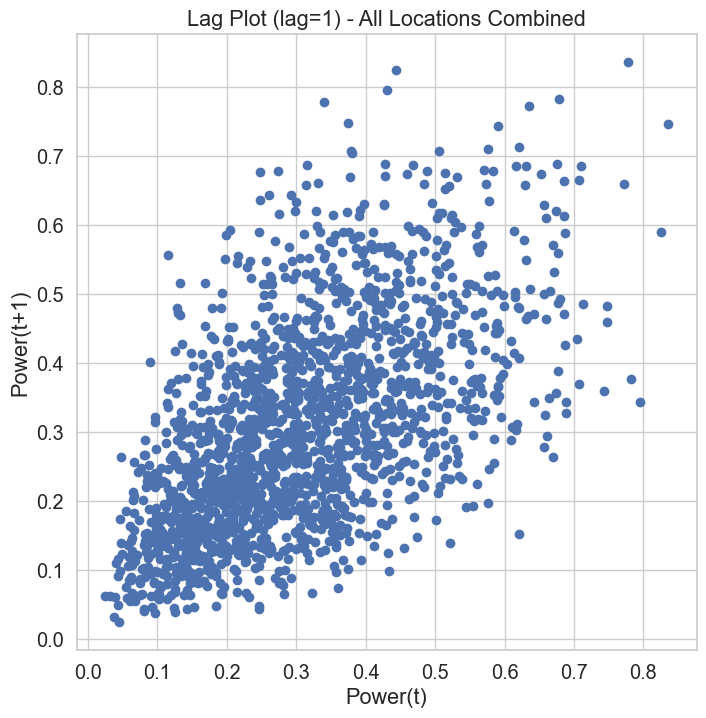

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Combine all locations into one long series
combined_power = data.groupby(data.index)['Power'].mean()

# If your data is not daily, you can resample:
combined_power = combined_power.resample('D').mean().interpolate()

# Plot Lag Plot
plt.figure(figsize=(8,8))
lag_plot(combined_power, lag=1)
plt.title("Lag Plot (lag=1) - All Locations Combined")
plt.xlabel("Power(t)")
plt.ylabel("Power(t+1)")
plt.grid(True)
plt.show()


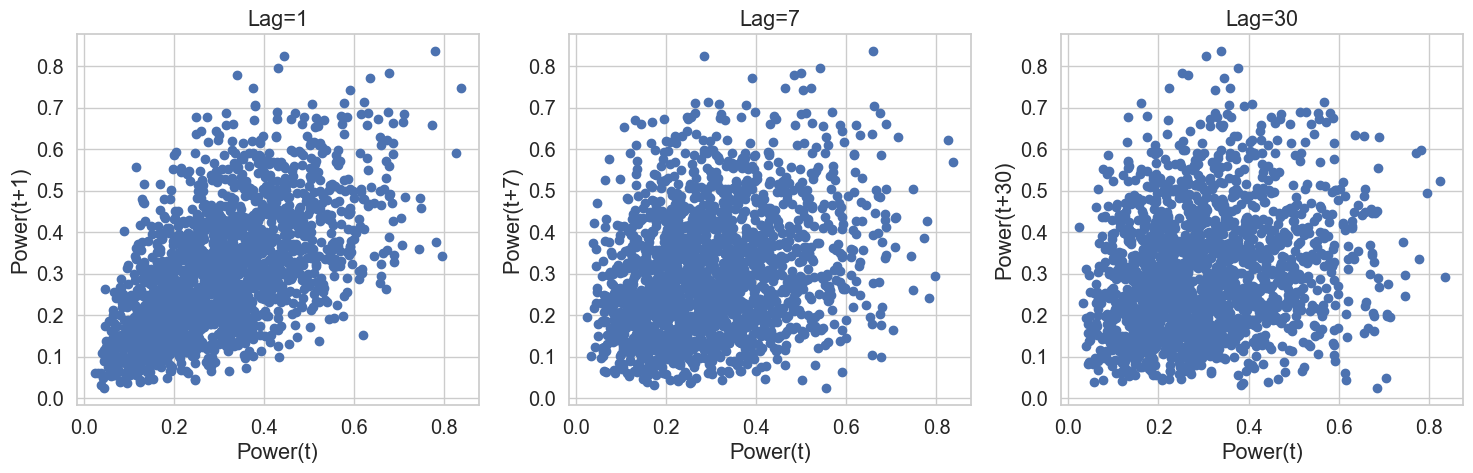

In [89]:
# Multiple lag plots
lags = [1, 7, 30]  # daily, weekly, monthly lag
plt.figure(figsize=(15, 5))

for i, lag in enumerate(lags, 1):
    plt.subplot(1, 3, i)
    lag_plot(combined_power, lag=lag)
    plt.title(f"Lag={lag}")
    plt.xlabel(f'Power(t)')
    plt.ylabel(f'Power(t+{lag})')
    plt.grid(True)

plt.tight_layout()
plt.show()


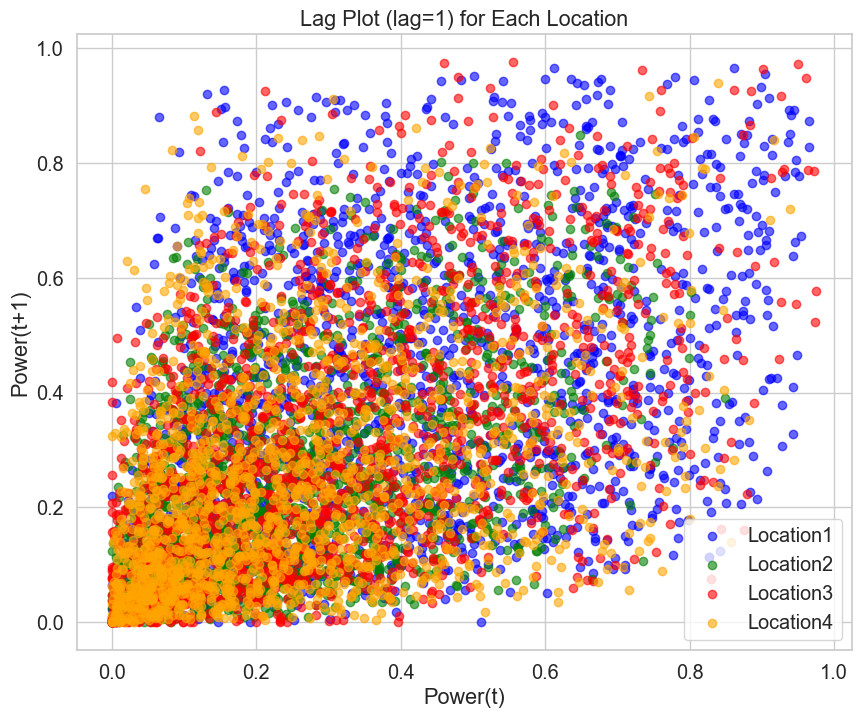

In [90]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
for i, loc in enumerate(data['Location'].unique()):
    # Get data for this location
    subset = data[data['Location'] == loc]
    
    # Resample to daily mean (if not already daily)
    subset_daily = subset['Power'].resample('D').mean().interpolate()
    
    # Plot lag plot for lag=1
    lag_plot(subset_daily, lag=1, c=colors[i % len(colors)], label=loc, alpha=0.6)

plt.title("Lag Plot (lag=1) for Each Location")
plt.xlabel("Power(t)")
plt.ylabel("Power(t+1)")
plt.legend()
plt.grid(True)
plt.show()
